<a href="https://colab.research.google.com/github/ThunderHuy/thuthaptienxulydulieu/blob/main/demo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

<h1>Get the data for the stock Apple, Google</h1>

In [2]:
dataAAPL = yf.download('AAPL', '2021-01-01', '2023-10-31')
dataGOOG = yf.download('GOOG', '2021-01-01', '2023-10-31')
data_AAPL = pd.DataFrame(dataAAPL)
data_GOOG = pd.DataFrame(dataGOOG)
data_AAPL.to_csv("dataAAPL.csv")
data_GOOG.to_csv("dataGOOG.csv")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<h1>Show data Apple, Google</h1>

In [3]:
#Apple
read_df = pd.read_csv("dataAAPL.csv")
read_df.set_index("Date", inplace=True)

read_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,127.164154,143301900
2021-01-05,128.889999,131.740005,128.429993,131.009995,128.736374,97664900
2021-01-06,127.720001,131.050003,126.379997,126.599998,124.402931,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,128.647934,109578200
2021-01-08,132.429993,132.630005,130.229996,132.050003,129.758362,105158200


In [4]:
#Google
read_df = pd.read_csv("dataGOOG.csv")
read_df.set_index("Date", inplace=True)

read_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,87.876999,88.032501,85.392502,86.412003,86.412003,38038000
2021-01-05,86.250000,87.383499,85.900749,87.045998,87.045998,22906000
2021-01-06,85.131500,87.400002,84.949997,86.764503,86.764503,52042000
2021-01-07,87.002998,89.419998,86.852501,89.362503,89.362503,45300000
2021-01-08,89.399002,90.491997,88.676750,90.360497,90.360497,41012000


<h1>Summary for quantitative columns</h1>

In [5]:
#Apple
data_AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,711.000000,711.000000,711.000000,711.000000,711.000000,7.110000e+02
mean,153.969621,155.726526,152.350309,154.106554,152.799165,8.083651e+07
std,18.569957,18.607307,18.575249,18.591145,18.916839,2.757499e+07
min,119.029999,120.400002,116.209999,116.360001,114.511490,3.145820e+07
25%,140.614998,142.849998,138.245003,140.925003,139.501427,6.024555e+07
50%,150.899994,153.000000,149.360001,151.029999,149.912277,7.583400e+07
75%,170.074997,171.845001,168.345001,170.250000,168.854851,9.440090e+07
max,196.240005,198.229996,195.279999,196.449997,195.926956,1.954327e+08


In [6]:
#Google
data_GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,711.000000,711.000000,711.000000,711.000000,711.000000,7.110000e+02
mean,119.123521,120.548210,117.842947,119.204826,119.204826,2.677612e+07
std,17.617757,17.541008,17.503729,17.510082,17.510082,1.059866e+07
min,85.131500,86.550003,83.449997,83.489998,83.489998,8.567800e+06
25%,103.752251,105.409252,102.901875,104.501999,104.501999,1.978030e+07
50%,119.589996,120.985001,118.684998,119.620003,119.620003,2.417010e+07
75%,134.934998,136.554001,133.404243,135.260498,135.260498,3.098015e+07
max,151.863495,152.100006,149.887497,150.709000,150.709000,9.779860e+07


<h1>Display the data types of each column</h1>

In [7]:
read_df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

<h1>Use interpolate to fill the empty value (NaN) with the average value</h1>

In [8]:
#Apple
data_AAPL.interpolate()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,127.164154,143301900
2021-01-05,128.889999,131.740005,128.429993,131.009995,128.736374,97664900
2021-01-06,127.720001,131.050003,126.379997,126.599998,124.402931,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,128.647934,109578200
2021-01-08,132.429993,132.630005,130.229996,132.050003,129.758362,105158200
...,...,...,...,...,...,...
2023-10-24,173.050003,173.669998,171.449997,173.440002,173.211807,43816600
2023-10-25,171.880005,173.059998,170.649994,171.100006,170.874893,57157000
2023-10-26,170.369995,171.380005,165.669998,166.889999,166.670425,70625300


In [9]:
#Google
data_GOOG.interpolate()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,87.876999,88.032501,85.392502,86.412003,86.412003,38038000
2021-01-05,86.250000,87.383499,85.900749,87.045998,87.045998,22906000
2021-01-06,85.131500,87.400002,84.949997,86.764503,86.764503,52042000
2021-01-07,87.002998,89.419998,86.852501,89.362503,89.362503,45300000
2021-01-08,89.399002,90.491997,88.676750,90.360497,90.360497,41012000
...,...,...,...,...,...,...
2023-10-24,139.160004,140.710007,138.750000,140.119995,140.119995,26535200
2023-10-25,129.770004,130.100006,126.089996,126.669998,126.669998,58796100
2023-10-26,124.470001,125.459999,122.320000,123.440002,123.440002,33907400


<h1>It transforms the data to a specific range (0 to 1 in this case)</h1>

In [10]:
#Apple
features = ['Open', 'Close' ,'High', 'Low', 'Volume']

scaler_AAPL = MinMaxScaler()
X = scaler_AAPL.fit_transform(data_AAPL[features])
X = pd.DataFrame(columns=features, data=X, index=data_AAPL.index)
X.head()

,Open,Close,High,Low,Volume
Date,,,,,
2021-01-04,0.187670,0.162942,0.169729,0.133426,0.682080
2021-01-05,0.127704,0.182919,0.145702,0.154547,0.403762
2021-01-06,0.112550,0.127856,0.136837,0.128620,0.753957
2021-01-07,0.120839,0.181795,0.144289,0.147338,0.476416
2021-01-08,0.173553,0.195905,0.157137,0.177311,0.449460


In [11]:
#Google
features = ['Open', 'Close' ,'High', 'Low', 'Volume']

scaler_GOOG = MinMaxScaler()
Y = scaler_GOOG.fit_transform(data_GOOG[features])
Y = pd.DataFrame(columns=features, data=Y, index=data_GOOG.index)
Y.head()

,Open,Close,High,Low,Volume
Date,,,,,
2021-01-04,0.041142,0.043470,0.022616,0.029238,0.330269
2021-01-05,0.016761,0.052902,0.012715,0.036888,0.160687
2021-01-06,0.000000,0.048714,0.012967,0.022578,0.487211
2021-01-07,0.028045,0.087364,0.043783,0.051214,0.411654
2021-01-08,0.063950,0.102211,0.060137,0.078672,0.363599


<h1>Visualize Open and Close Apple</h1>

<function matplotlib.pyplot.show(close=None, block=None)>

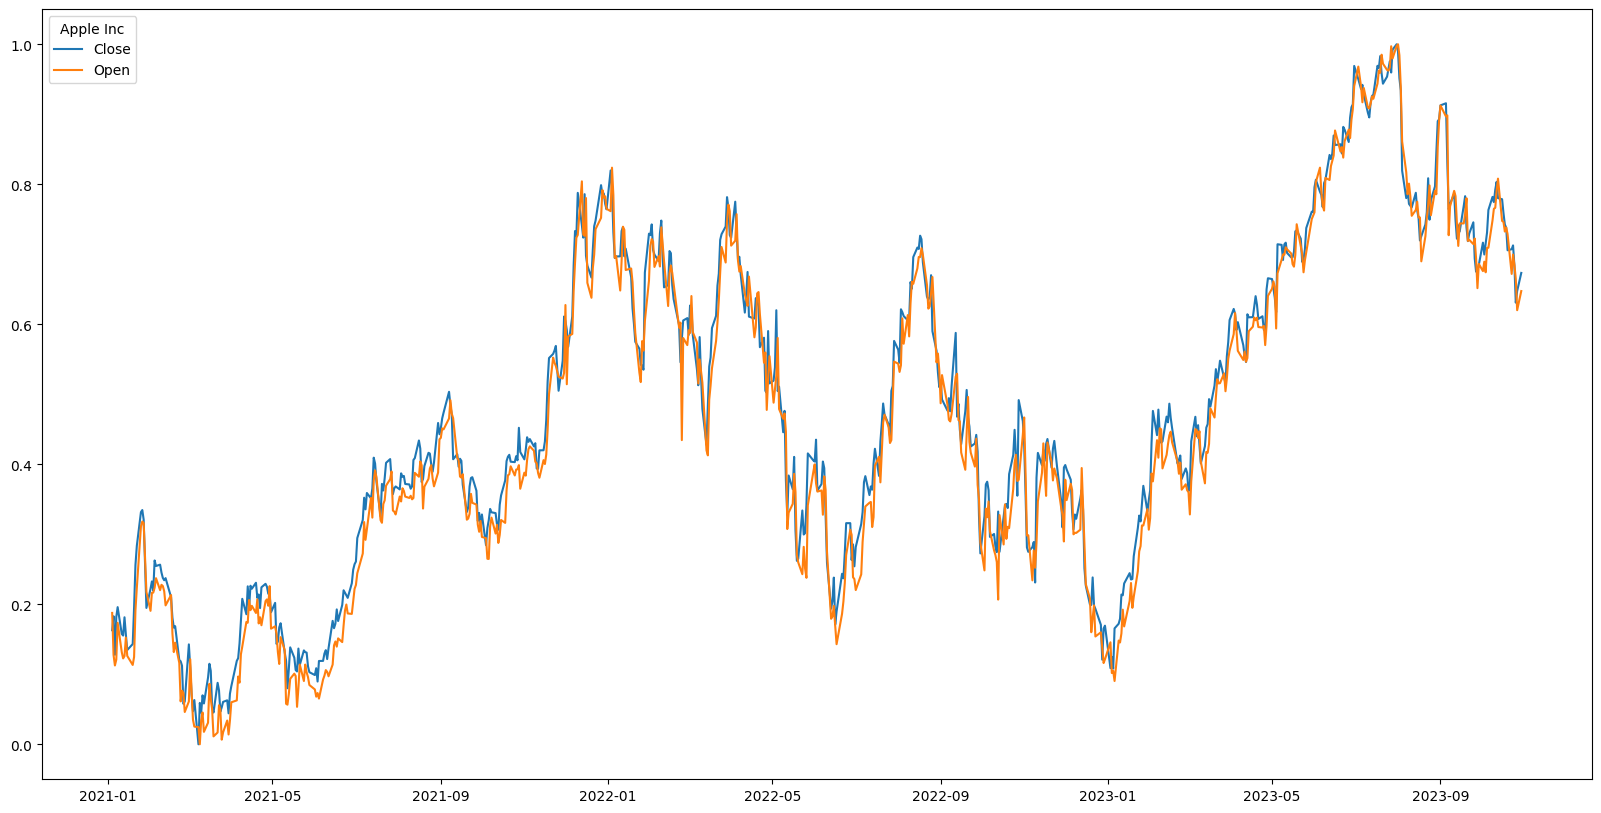

In [12]:
#Apple
date =  X.index
plt.plot(date, X.Close, label = "Close")
plt.plot(date, X.Open, label = "Open")
plt.legend(title = "Apple Inc", loc = 'upper left')
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show

<h1>Visualize Open and Close Google</h1>


<function matplotlib.pyplot.show(close=None, block=None)>

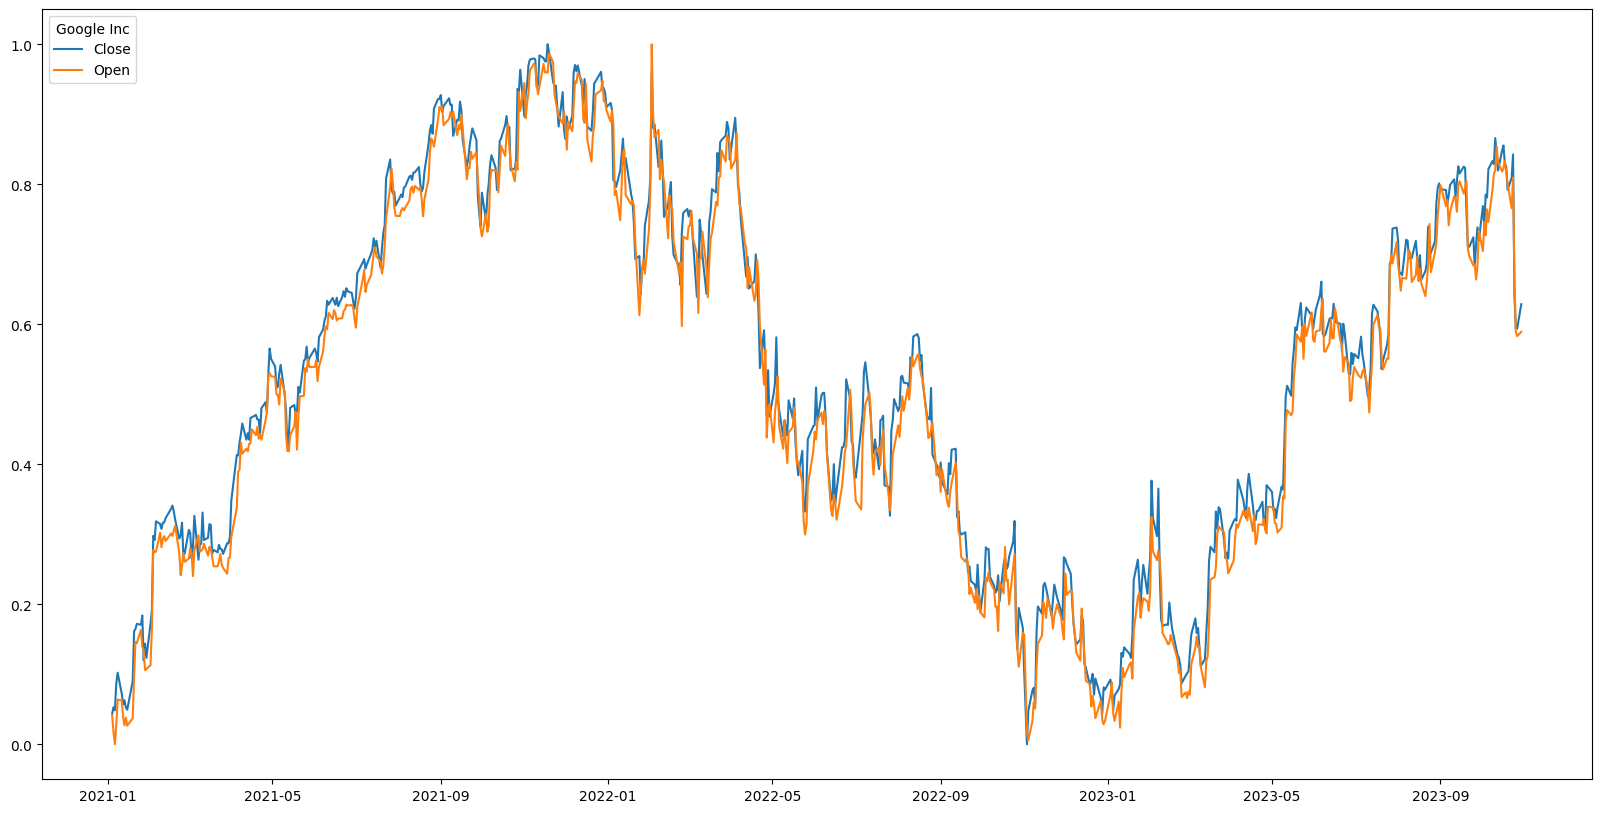

In [13]:
#Google
date =  Y.index
plt.plot(date, Y.Close, label = "Close")
plt.plot(date, Y.Open, label = "Open")
plt.legend(title = "Google Inc", loc = 'upper left')
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show

<h1>Visualze Open Apple, Google</h1>

<function matplotlib.pyplot.show(close=None, block=None)>

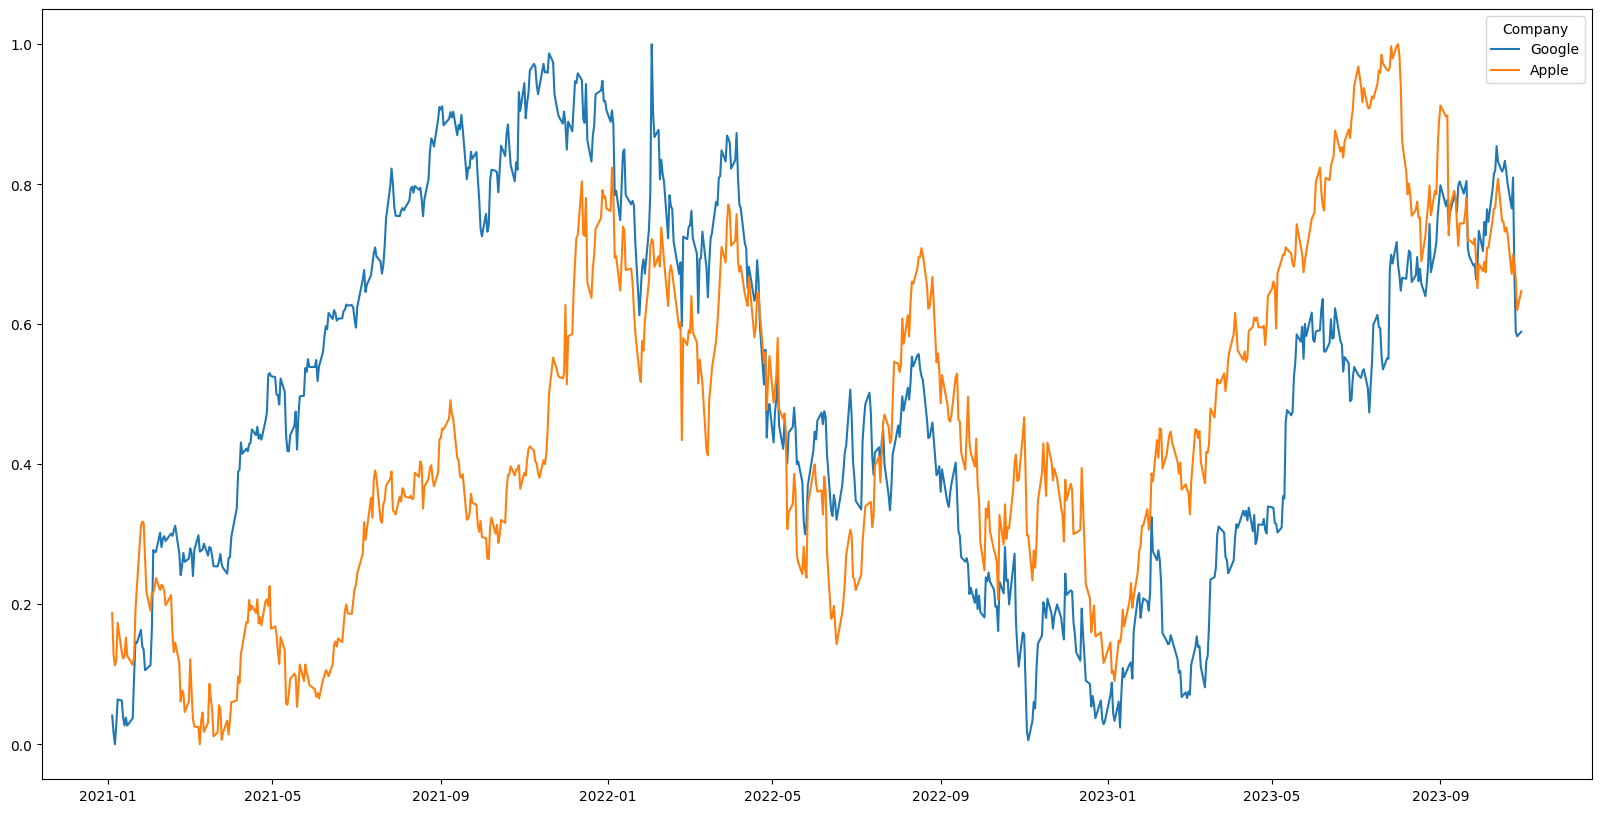

In [14]:
date =  X.index
plt.plot(date, Y.Open, label = "Google")
plt.plot(date, X.Open, label = "Apple")
plt.legend(title = "Company")
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show

<h1>Visualze volume Apple, Google</h1>

<function matplotlib.pyplot.show(close=None, block=None)>

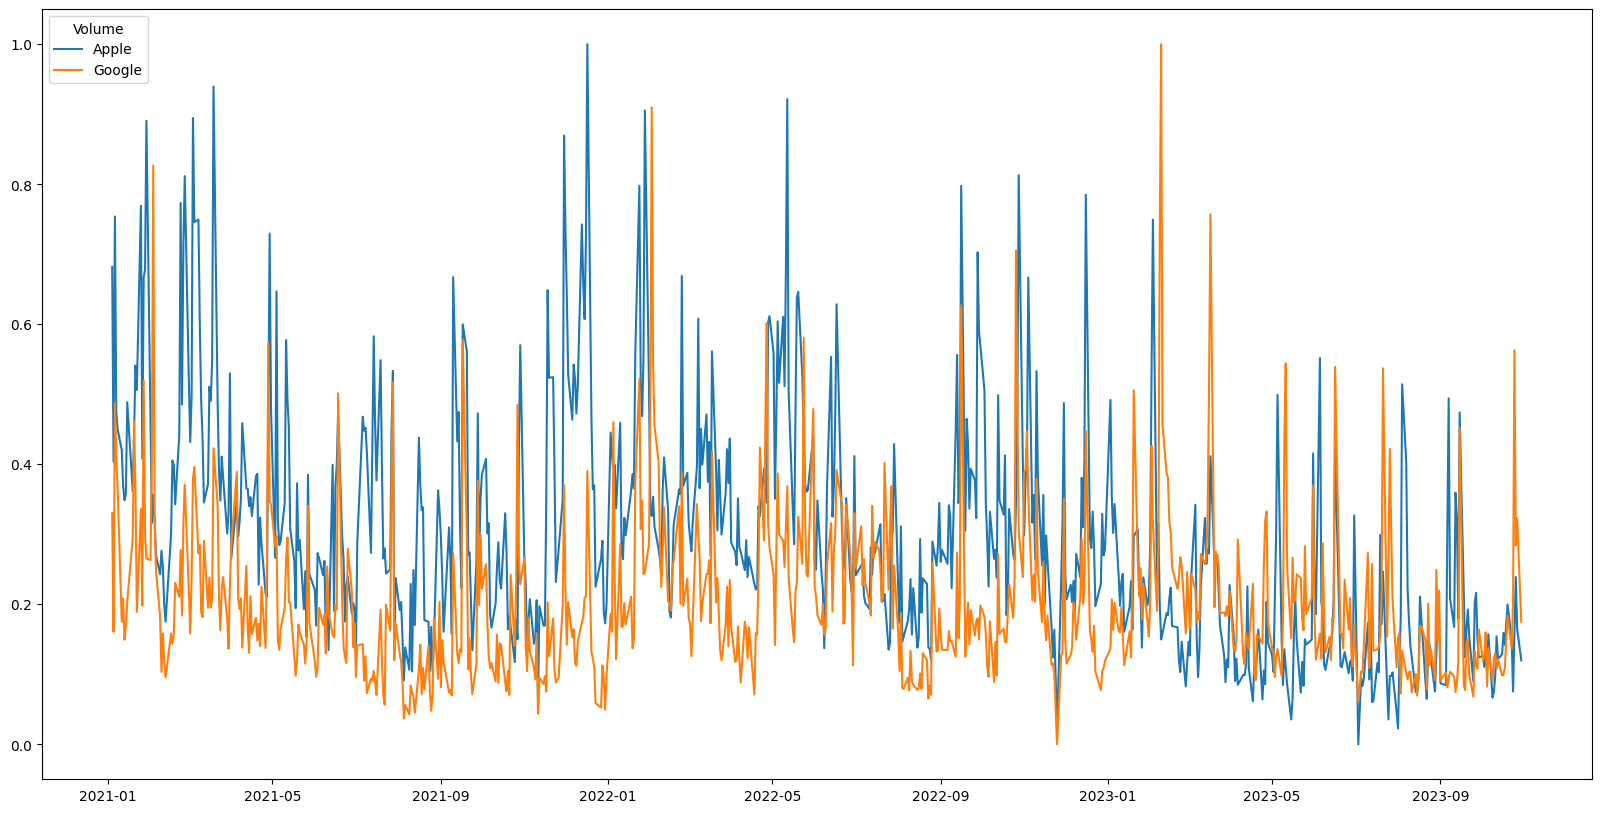

In [15]:
date =  X.index
plt.plot(date, X.Volume, label = "Apple")
plt.plot(date, Y.Volume, label = "Google")
plt.legend(title = "Volume", loc = 'upper left')
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show

<h1>Visualize Close Apple, Google</h1>

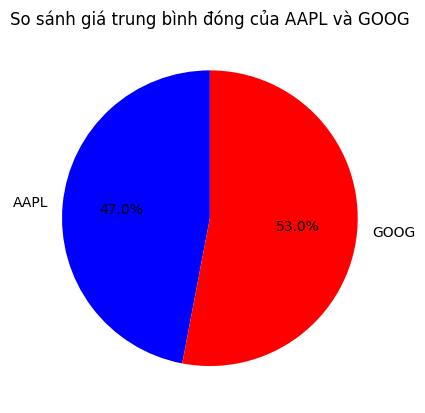

In [16]:
close_AAPL = X['Close'].mean()
close_GOOG = Y['Close'].mean()
values = [close_AAPL, close_GOOG]
labels = ['AAPL', 'GOOG']
colors = ['blue', 'red']
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('So sánh giá trung bình đóng của AAPL và GOOG')
plt.show()